Dans cette partie du script, les bibliothèques suivantes sont importées :

- **`matplotlib.pyplot`** : Pour les visualisations (graphiques, camemberts, etc.).
- **`sklearn.manifold.MDS`** : Pour l'analyse multidimensionnelle (MDS).
- **`numpy`** : Pour les calculs numériques et tableaux multidimensionnels.
- **`pandas`** : Pour manipuler et analyser des données tabulaires.
- **`math`** : Pour les fonctions mathématiques de base.

Ces outils sont essentiels pour les analyses et visualisations du projet.

In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd;
import math

In [2]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

Charge un fichier Excel (nobel.xlsx) dans un DataFrame pandas appelé dataset.

In [3]:
dataset = pd.read_excel("C:\\Users\\exe\\Desktop\\Scripts\\Coding\\Python\\Projects\\Data Analyst\\AFC\\nobel.xlsx") # Load data
print(dataset)

         Pays  Chimie  Economie  Littérature  Médecine  Paix  Physique  \
0   Allemagne      24         1            8        18     5        24   
1      Canada       4         3            2         4     1         4   
2      France       8         3           11        12    10         9   
3          GB      23         6            7        26    11        20   
4      Italie       1         1            6         5     1         5   
5       Japon       6         0            2         3     1        11   
6      Russie       4         3            5         2     3        10   
7         USA      51        43            8        70    19        66   
8     Afrique       1         0            5         3     8         2   
9    Amérique      56        47           18        78    25        70   
10       Asie      17         2           10         7    16        19   
11     Europe      94        26           79       110    51       103   
12    Océanie       3         0       

Récupère :

Les noms des lignes (première colonne du fichier) → rows_index

Les noms des colonnes (en ignorant la première colonne) → columns_index

In [4]:
rows_index = dataset.iloc[:,0] # Nom des Lignes
print(rows_index)
columns_index = dataset.columns[1:] # Nom des colonnes
print(columns_index)

0     Allemagne
1        Canada
2        France
3            GB
4        Italie
5         Japon
6        Russie
7           USA
8       Afrique
9      Amérique
10         Asie
11       Europe
12      Océanie
Name: Pays, dtype: object
Index(['Chimie', 'Economie', 'Littérature', 'Médecine', 'Paix', 'Physique',
       'Mathématiques'],
      dtype='object')


Supprime la première colonne du dataset (elle servait juste pour les noms de lignes).

In [5]:
dataset = dataset.iloc[:,1:] # Remove first column

Calcule la somme de toutes les valeurs dans le dataset et la stocke dans N.

In [6]:
N = dataset.values.sum() # sum of all values
print(N)

1533


Définit une fonction Frequence() qui :

Crée une copie du dataset

Divise chaque valeur du tableau par N pour obtenir les fréquences.

Retourne le tableau des fréquences (Freq).

In [7]:
def Frequence(dataset): # function : return Tableau des fréquence
    freq = dataset.copy()
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[1]):
            freq.iloc[i,j] = freq.iloc[i,j] / N
    return freq

Freq = Frequence(dataset) # Initialize Tableau des fréquence
print(Freq)

      Chimie  Economie  Littérature  Médecine      Paix  Physique  \
0   0.015656  0.000652     0.005219  0.011742  0.003262  0.015656   
1   0.002609  0.001957     0.001305  0.002609  0.000652  0.002609   
2   0.005219  0.001957     0.007175  0.007828  0.006523  0.005871   
3   0.015003  0.003914     0.004566  0.016960  0.007175  0.013046   
4   0.000652  0.000652     0.003914  0.003262  0.000652  0.003262   
5   0.003914  0.000000     0.001305  0.001957  0.000652  0.007175   
6   0.002609  0.001957     0.003262  0.001305  0.001957  0.006523   
7   0.033268  0.028050     0.005219  0.045662  0.012394  0.043053   
8   0.000652  0.000000     0.003262  0.001957  0.005219  0.001305   
9   0.036530  0.030659     0.011742  0.050881  0.016308  0.045662   
10  0.011089  0.001305     0.006523  0.004566  0.010437  0.012394   
11  0.061318  0.016960     0.051533  0.071755  0.033268  0.067189   
12  0.001957  0.000000     0.000000  0.005871  0.000000  0.001305   

    Mathématiques  
0        0.00

Calcule la somme des lignes dans Freq pour obtenir les fréquences marginales (somme_ligne).

In [8]:
somme_ligne = Freq.sum(axis=1) # Initialize fréquences marginales f_i.
print(somme_ligne)

0     0.052838
1     0.012394
2     0.041748
3     0.063275
4     0.013046
5     0.016960
6     0.023483
7     0.176125
8     0.013046
9     0.201566
10    0.050881
11    0.324201
12    0.010437
dtype: float64


Calcule la somme des colonnes dans Freq pour obtenir les fréquences marginales des colonnes (somme_colonne).

In [9]:
somme_colonne = Freq.sum(axis=0) # Initialize fréquences marginales f_.j
print(somme_colonne)

Chimie           0.190476
Economie         0.088063
Littérature      0.105023
Médecine         0.226354
Paix             0.098500
Physique         0.225049
Mathématiques    0.066536
dtype: float64


Définit une fonction PieChart() pour afficher un graphique en camembert avec :

Les données (fréquences marginales) et les labels.

Affiche un camembert pour les fréquences des lignes et des colonnes.

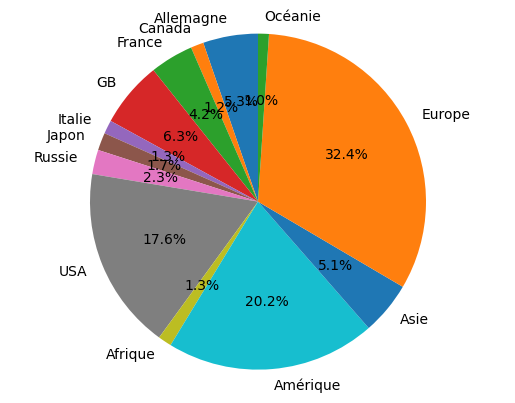

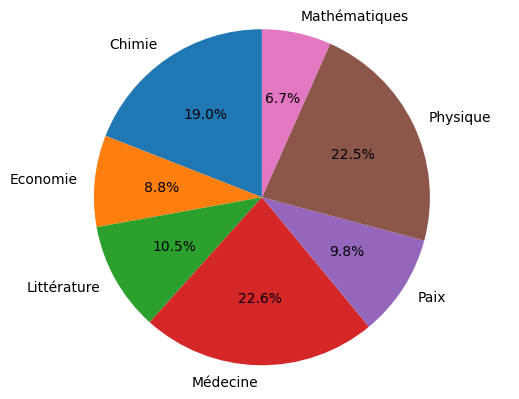

In [10]:
def PieChart(pd_data,labels): # function : Show PieChart
    plt.pie(pd_data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()
    
PieChart(somme_ligne, rows_index) # Camembert des fréquence des lignes
PieChart(somme_colonne, columns_index) # Camembert des fréquence des colonnes

Définit une fonction Matrice_X2() qui calcule la matrice de contribution X² en utilisant la formule statistique :

Compare les valeurs observées avec les valeurs théoriques basées sur les fréquences marginales.

Retourne la matrice X² (MatContribution).

In [11]:
def Matrice_X2(Freq): # function : Matrice de contribution X2
    MatX2 = Freq.copy()
    for i in range(Freq.shape[0]):
        for j in range(Freq.shape[1]):
            eff_theorique = somme_ligne[i] * somme_colonne[j]
            MatX2.iloc[i,j] = (Freq.iloc[i,j] - eff_theorique)**2 / eff_theorique
    return MatX2

MatContribution = Matrice_X2(Freq)
print(MatContribution)

          Chimie  Economie   Littérature  Médecine      Paix  Physique  \
0   3.106265e-03  0.003440  1.969912e-05  0.000004  0.000725  0.001192   
1   2.615802e-05  0.000686  6.816043e-09  0.000014  0.000265  0.000012   
2   9.396453e-04  0.000804  1.776581e-03  0.000278  0.001414  0.001322   
3   7.225269e-04  0.000493  6.504666e-04  0.000486  0.000143  0.000100   
4   1.351614e-03  0.000215  4.722496e-03  0.000032  0.000312  0.000036   
5   1.445608e-04  0.001494  1.275124e-04  0.000923  0.000621  0.002955   
6   7.765663e-04  0.000006  2.564519e-04  0.003026  0.000055  0.000290   
7   2.329699e-06  0.010138  9.532400e-03  0.000843  0.001415  0.000294   
8   1.351614e-03  0.001149  2.610979e-03  0.000336  0.012040  0.000907   
9   9.047375e-05  0.009387  4.198313e-03  0.000605  0.000633  0.000002   
10  2.016086e-04  0.002251  2.603644e-04  0.004195  0.005873  0.000078   
11  3.062515e-06  0.004705  8.978540e-03  0.000036  0.000056  0.000457   
12  4.853540e-07  0.000919  1.096129e-

Définit une fonction statistique_X2() pour calculer la statistique Chi² :

Utilise la formule X² pour comparer les valeurs observées et théoriques, puis les additionne pour obtenir la statistique finale.

Retourne la valeur de Chi² (X2).

In [12]:
def statistique_X2(Freq): # function : Calculate Chi2
    somme = 0
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[1]):
            eff_theorique = somme_ligne[i] * somme_colonne[j]
            somme += (Freq.iloc[i,j] - eff_theorique)**2 / eff_theorique
    return somme

X2 = statistique_X2(Freq)
print(X2)

0.15268496603634446


Définit une fonction profile_ligne() pour calculer le profil de chaque ligne dans la matrice des fréquences :

Divise chaque valeur de la ligne par la somme de cette ligne.

Retourne la matrice des profils des lignes (prof_ligne).

In [13]:
def profile_ligne(Freq): # function : Calculate profile ligne
    pl = Freq.copy()
    for i in range(Freq.shape[0]):
        for j in range(Freq.shape[1]):
            pl.iloc[i,j] = pl.iloc[i,j]/somme_ligne[i]
    return pl

prof_ligne = profile_ligne(Freq) # Matrice profile ligne
print(prof_ligne)

      Chimie  Economie  Littérature  Médecine      Paix  Physique  \
0   0.296296  0.012346     0.098765  0.222222  0.061728  0.296296   
1   0.210526  0.157895     0.105263  0.210526  0.052632  0.210526   
2   0.125000  0.046875     0.171875  0.187500  0.156250  0.140625   
3   0.237113  0.061856     0.072165  0.268041  0.113402  0.206186   
4   0.050000  0.050000     0.300000  0.250000  0.050000  0.250000   
5   0.230769  0.000000     0.076923  0.115385  0.038462  0.423077   
6   0.111111  0.083333     0.138889  0.055556  0.083333  0.277778   
7   0.188889  0.159259     0.029630  0.259259  0.070370  0.244444   
8   0.050000  0.000000     0.250000  0.150000  0.400000  0.100000   
9   0.181230  0.152104     0.058252  0.252427  0.080906  0.226537   
10  0.217949  0.025641     0.128205  0.089744  0.205128  0.243590   
11  0.189135  0.052314     0.158954  0.221328  0.102616  0.207243   
12  0.187500  0.000000     0.000000  0.562500  0.000000  0.125000   

    Mathématiques  
0        0.01

Définit une fonction profile_colonne() pour calculer le profil de chaque colonne dans la matrice des fréquences :

Divise chaque valeur de la colonne par la somme de cette colonne.

Retourne la matrice des profils des colonnes (prof_colonne).

In [14]:
def profile_colonne(Freq): # function : Calculate profile colonne
    pl = Freq.copy()
    for i in range(Freq.shape[0]):
        for j in range(Freq.shape[1]):
            pl.iloc[i,j] = pl.iloc[i,j]/somme_colonne[j]
    return pl

prof_colonne = profile_colonne(Freq) # Matrice profile colonne
print(prof_colonne)

      Chimie  Economie  Littérature  Médecine      Paix  Physique  \
0   0.082192  0.007407     0.049689  0.051873  0.033113  0.069565   
1   0.013699  0.022222     0.012422  0.011527  0.006623  0.011594   
2   0.027397  0.022222     0.068323  0.034582  0.066225  0.026087   
3   0.078767  0.044444     0.043478  0.074928  0.072848  0.057971   
4   0.003425  0.007407     0.037267  0.014409  0.006623  0.014493   
5   0.020548  0.000000     0.012422  0.008646  0.006623  0.031884   
6   0.013699  0.022222     0.031056  0.005764  0.019868  0.028986   
7   0.174658  0.318519     0.049689  0.201729  0.125828  0.191304   
8   0.003425  0.000000     0.031056  0.008646  0.052980  0.005797   
9   0.191781  0.348148     0.111801  0.224784  0.165563  0.202899   
10  0.058219  0.014815     0.062112  0.020173  0.105960  0.055072   
11  0.321918  0.192593     0.490683  0.317003  0.337748  0.298551   
12  0.010274  0.000000     0.000000  0.025937  0.000000  0.005797   

    Mathématiques  
0        0.00

Définit une fonction barres_empilees() pour afficher des graphes en barres empilées horizontales :

Affiche un graphique des profils de lignes et des profils de colonnes, avec les barres empilées pour chaque ligne ou colonne.

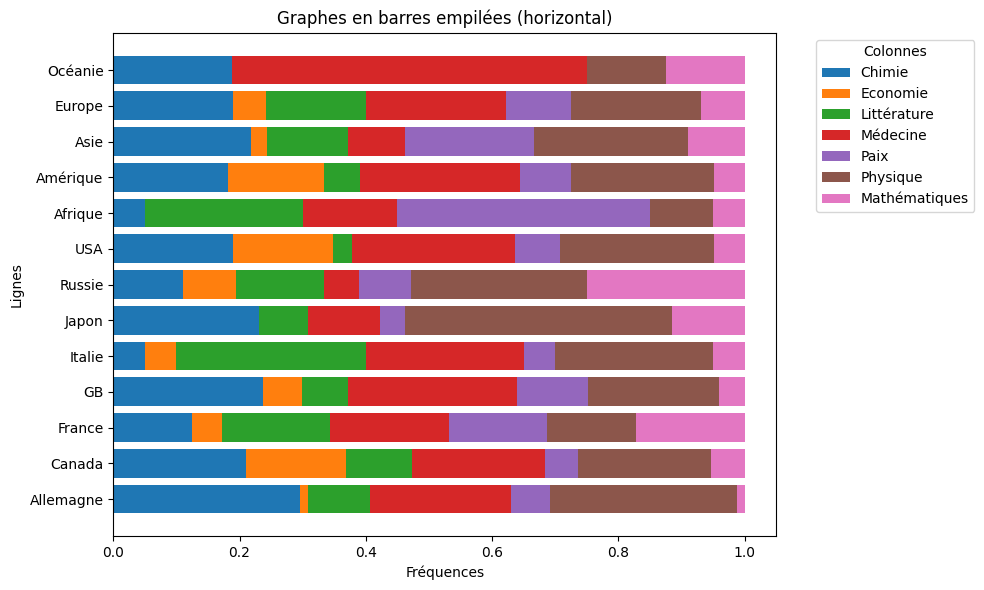

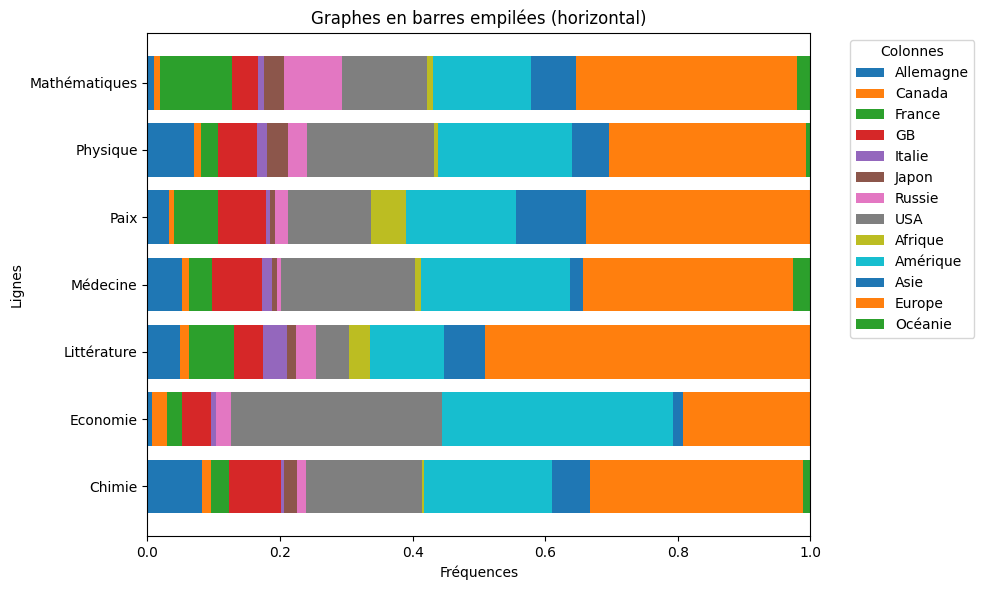

In [15]:
def barres_empilees(Freq, rows_index, columns_index): # function : Show graphes en barres empilées
    fig, ax = plt.subplots(figsize=(10, 6))
    left = np.zeros(Freq.shape[0])
    for col in range(Freq.shape[1]):
        ax.barh(rows_index, Freq.iloc[:, col], left=left, label=columns_index[col])
        left += Freq.iloc[:, col]
    ax.set_ylabel('Lignes')
    ax.set_xlabel('Fréquences')
    ax.set_title('Graphes en barres empilées (horizontal)')
    ax.legend(title='Colonnes', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

barres_empilees(prof_ligne, rows_index, columns_index) # graphes en barres empilées des lignes
barres_empilees(prof_colonne.T, columns_index, rows_index) # graphes en barres empilées des colonnes

Définit une fonction Matrice_Corrige() pour calculer la matrice corrigée :

Ajuste chaque valeur de la matrice des fréquences en soustrayant la valeur théorique, puis la divise par la racine carrée de cette valeur théorique.

Retourne la matrice corrigée (MatCorr).

In [16]:
def Matrice_Corrige(Freq): # function : Matrice corrigé
    MatCorr = Freq.copy()
    for i in range(Freq.shape[0]):
        for j in range(Freq.shape[1]):
            eff_theorique = somme_ligne[i] * somme_colonne[j]
            MatCorr.iloc[i,j] = (Freq.iloc[i,j] - eff_theorique) / math.sqrt(eff_theorique)
    return MatCorr

MatCorr = Matrice_Corrige(Freq) # Matrice Corrigé
print(MatCorr)

      Chimie  Economie  Littérature  Médecine      Paix  Physique  \
0   0.055734 -0.058650    -0.004438 -0.001996 -0.026932  0.034522   
1   0.005114  0.026198     0.000083 -0.003704 -0.016270 -0.003408   
2  -0.030654 -0.028359     0.042150 -0.016686  0.037597 -0.036362   
3   0.026880 -0.022214    -0.025504  0.022041  0.011944 -0.010002   
4  -0.036764 -0.014650     0.068720  0.005677 -0.017651  0.006008   
5   0.012023 -0.038647    -0.011292 -0.030375 -0.024913  0.054363   
6  -0.027867 -0.002442     0.016014 -0.055014 -0.007405  0.017033   
7  -0.001526  0.100687    -0.097634  0.029026 -0.037614  0.017158   
8  -0.036764 -0.033895     0.051098 -0.018331  0.109727 -0.030108   
9  -0.009512  0.096888    -0.064794  0.024605 -0.025168  0.001409   
10  0.014199 -0.047448     0.016136 -0.064769  0.076636  0.008816   
11 -0.001750 -0.068592     0.094755 -0.006015  0.007467 -0.021371   
12 -0.000697 -0.030317    -0.033108  0.072181 -0.032063 -0.021546   

    Mathématiques  
0       -0.04

Calcule la décomposition en valeurs singulières (SVD) de la matrice corrigée (MatCorr) :

U, s, et Vt sont les résultats de la décomposition, où U et Vt sont les matrices unitaires et s est le vecteur des valeurs singulières.

In [17]:
U, s, Vt = np.linalg.svd(MatCorr, full_matrices=False) # Calcule SVD

Calcule les valeurs propres à partir des valeurs singulières (s), puis les affiche :

ValPropres: Valeurs propres en ordre décroissant.

ValPropres_Pourcentage: Proportion de chaque valeur propre par rapport à la somme totale.

ValPropres_Cumule: Valeurs propres cumulées pour visualiser la contribution progressive des valeurs propres.

In [18]:
ValPropres = s**2 # Valeurs Propres dans l'ordre décroissant
print("Valeurs Propres : ", ValPropres)
ValPropres_Pourcentage = ValPropres/sum(ValPropres) * 100 # Valeurs Propres en Pourcentage
print("Valeurs Propres (Pourcentages) : ", ValPropres_Pourcentage)

# Calcule des Valeurs Propres Cumulées
ValPropres_Cumule = []
somme = 0
for val in ValPropres_Pourcentage:
    somme += val
    ValPropres_Cumule.append(somme)
print("Valeurs Propres (Cumulé) : ", ValPropres_Cumule)

Valeurs Propres :  [7.88919627e-02 2.64897049e-02 2.01714398e-02 1.55598136e-02
 9.68700954e-03 1.88503546e-03 2.79600142e-33]
Valeurs Propres (Pourcentages) :  [5.16697647e+01 1.73492555e+01 1.32111499e+01 1.01907961e+01
 6.34444228e+00 1.23459140e+00 1.83122248e-30]
Valeurs Propres (Cumulé) :  [np.float64(51.669764721156795), np.float64(69.01902026587092), np.float64(82.23017018286723), np.float64(92.42096632046851), np.float64(98.76540860020367), np.float64(100.0), np.float64(100.0)]


Calcule les coordonnées des lignes et des colonnes à partir de la décomposition SVD :

coord_lignes: Coordonnées des lignes (tranches d'âge).

coord_colonnes: Coordonnées des colonnes (réseaux sociaux).

Affiche un nuage de points (plan factoriel AFC) :

Les lignes sont représentées par des points bleus, et les colonnes par des triangles rouges.

Les axes sont tracés pour faciliter l'interprétation.

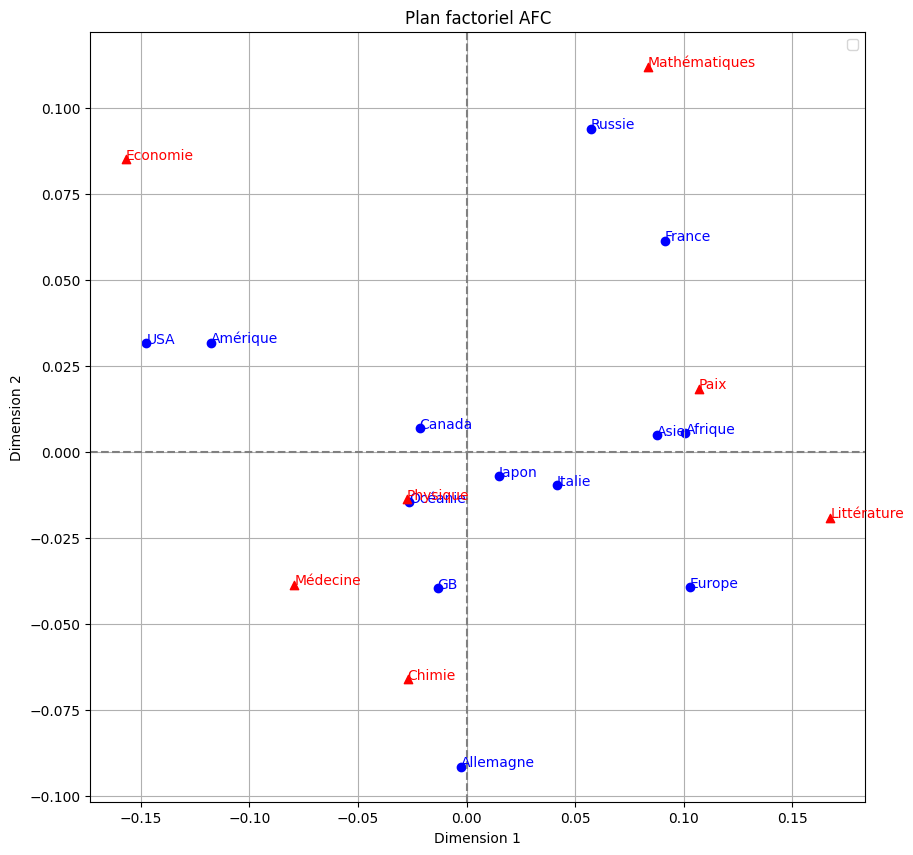

In [19]:
# Coordonnées lignes (tranches d'âge)
coord_lignes = U * s

# Coordonnées colonnes (réseaux sociaux)
coord_colonnes = Vt.T * s

def Nuage_de_Points(xCord, yCord):
    plt.figure(figsize=(10,10))
    
# Lignes
    plt.scatter(xCord[:,0], xCord[:,1], color='blue', label="")
    for i, txt in enumerate(rows_index):
        plt.annotate(txt, (xCord[i,0], xCord[i,1]), color='blue')

    # Colonnes
    plt.scatter(yCord[:,0], yCord[:,1], color='red', marker='^', label="")
    for i, txt in enumerate(columns_index):
        plt.annotate(txt, (yCord[i,0], yCord[i,1]), color='red')

    # Axes
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')

    plt.title('Plan factoriel AFC')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid()
    plt.show()
    
Nuage_de_Points(coord_lignes, coord_colonnes)

Affiche un histogramme des valeurs propres cumulées :

Montre l'accumulation des valeurs propres en pourcentage sur chaque dimension.

Aide à visualiser la contribution de chaque dimension dans l'analyse factorielle.

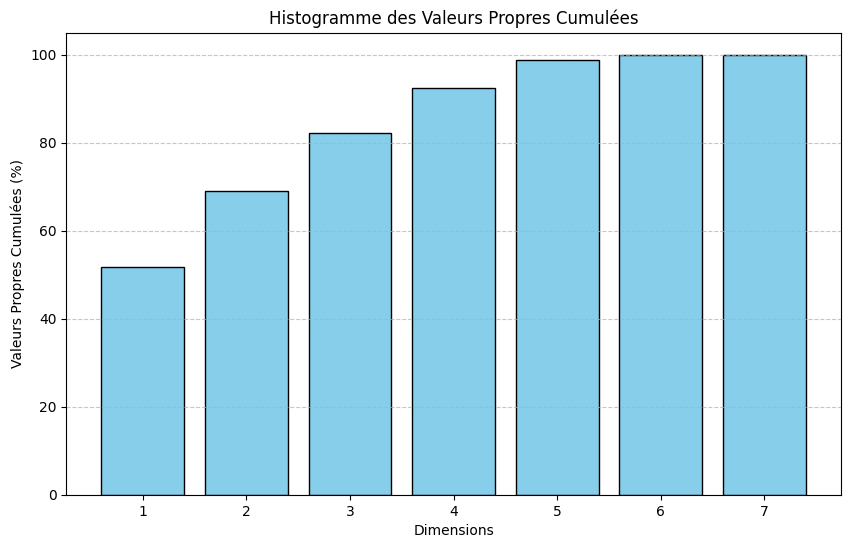

In [20]:
def Histogramme_ValPropres_Cumule(ValPropres_Cumule):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(ValPropres_Cumule) + 1), ValPropres_Cumule, color='skyblue', edgecolor='black')
    plt.xlabel('Dimensions')
    plt.ylabel('Valeurs Propres Cumulées (%)')
    plt.title('Histogramme des Valeurs Propres Cumulées')
    plt.xticks(range(1, len(ValPropres_Cumule) + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Histogramme_ValPropres_Cumule(ValPropres_Cumule)